All required packages imported (no seaborn).

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          3858 non-null   object 
 1   wins                                          3858 non-null   int64  
 2   losses                                        3858 non-null   int64  
 3   draws                                         3858 non-null   int64  
 4   height_cm                                     3809 non-null   float64
 5   weight_in_kg                                  3855 non-null   float64
 6   reach_in_cm                                   3858 non-null   float64
 7   stance                                        3858 non-null   object 
 8   date_of_birth                                 3858 non-null   object 
 9  

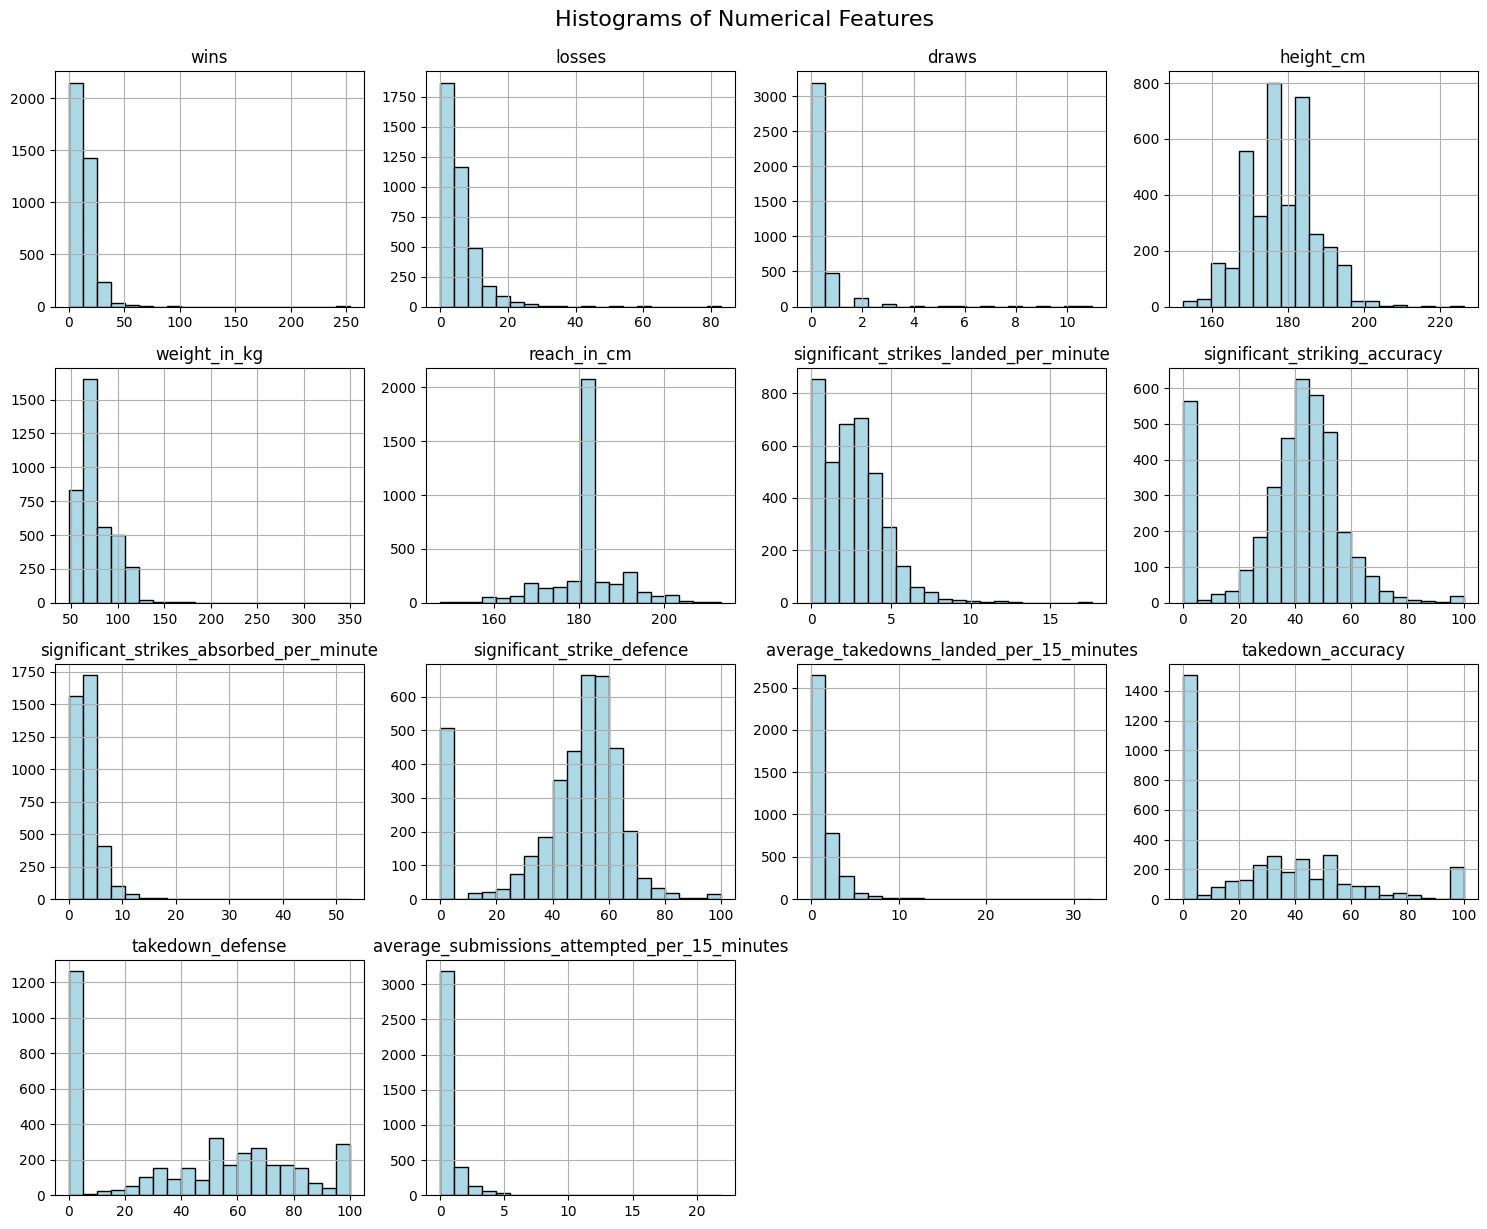

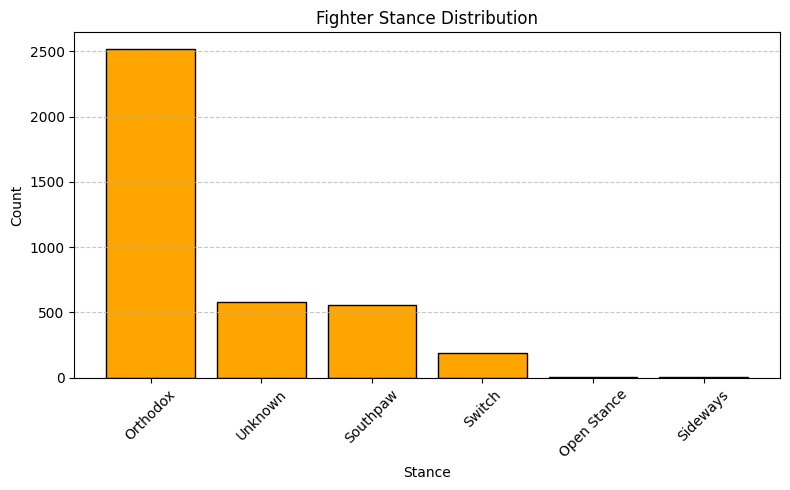


--- Correlation Matrix ---
                                              wins  losses  draws  height_cm  \
wins                                          1.00    0.62   0.33       0.02   
losses                                        0.62    1.00   0.37       0.04   
draws                                         0.33    0.37   1.00      -0.04   
height_cm                                     0.02    0.04  -0.04       1.00   
weight_in_kg                                 -0.03    0.07   0.00       0.72   
reach_in_cm                                   0.06    0.05  -0.01       0.69   
significant_strikes_landed_per_minute         0.10   -0.10  -0.09      -0.03   
significant_striking_accuracy                 0.17   -0.00  -0.04       0.01   
significant_strikes_absorbed_per_minute      -0.02   -0.04  -0.03      -0.03   
significant_strike_defence                    0.24    0.06   0.01      -0.14   
average_takedowns_landed_per_15_minutes       0.05   -0.06  -0.04      -0.05   
takedown_acc

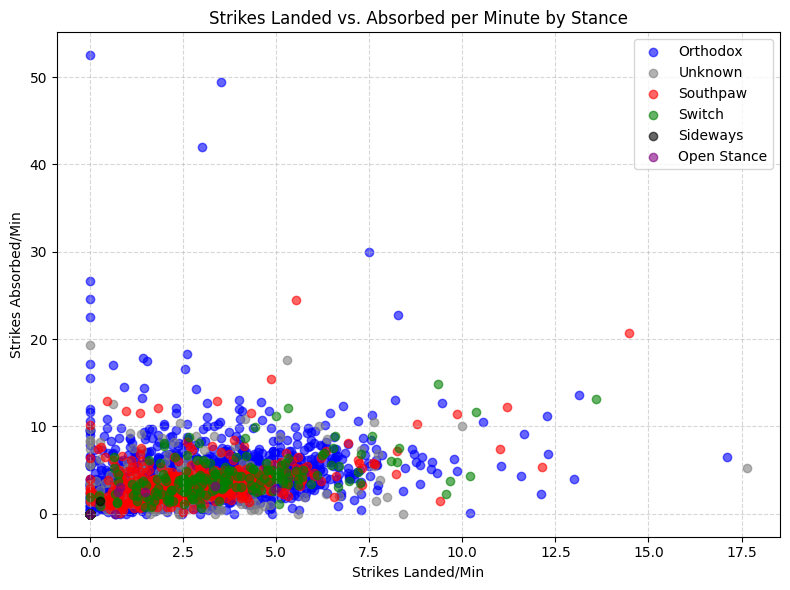

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('ufc_cleaned_data.csv')

# Initial Overview
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Descriptive Statistics
desc_stats = df.describe()
print(desc_stats)

# Distribution of Numeric Features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(16, 12), bins=30)
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.savefig("eda_numeric_distribution.png")
plt.show()

# Target Variable Distribution
df['Result'].value_counts().plot(kind='bar', title='Fight Result Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("eda_result_distribution.png")
plt.show()

# Correlation Matrix
correlation = df[numeric_cols].corr()
plt.figure(figsize=(14, 10))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig("eda_correlation_matrix.png")
plt.show()

# Strikes Landed Per Minute by Result
df.boxplot(column='significant_strikes_landed_per_minute', by='Result')
plt.title('Strikes Landed Per Minute by Result')
plt.suptitle('')
plt.xlabel('Result')
plt.ylabel('Strikes Landed Per Minute')
plt.tight_layout()
plt.savefig("eda_strikes_boxplot.png")
plt.show()

# Takedown Defense by Result
df.boxplot(column='takedown_defense', by='Result')
plt.title('Takedown Defense by Result')
plt.suptitle('')
plt.xlabel('Result')
plt.ylabel('Takedown Defense (%)')
plt.tight_layout()
plt.savefig("eda_takedown_defense.png")
plt.show()

# Fighter Stance Distribution
df['stance'].value_counts().plot(kind='bar', title='Fighter Stance Distribution')
plt.xlabel('Stance')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("eda_stance_distribution.png")
plt.show()
